# Problem


Suppose we have to build $n$ columns. 

Each column, to be constructed, must consist of $k$ bricks.

Let $M = \{m_1, \dots, m_{n*k}\}$ be the set of available bricks.

Each brick is characterized by a height $h(m_i) = h_i$ with $i = 1,..., l$.

The $i$-th column is defined as $C_i \subset M$, and the constraints that the column must satisfy are formalized as follows:
$$
    \#C_i = k \; \; \text{for every $i = 1, \dots, n$}
$$
$$
    C_i \cap C_j = \emptyset \; \; \text{for every $i, j = 1, \dots, n$ and $ i \neq j$}
$$ 

The height of a column $H(C_i)$ is defined as the sum of the heights of the bricks that compose it:
$$
    H(C_i) = \sum_{j \in C_i} h(m_j)
$$

The objective function $f$ to be minimized is the difference between the tallest column and the shortest column: 
$$
f(C_1,\dots, C_{n}) = H_{max} -  H_{min} 
$$
where $C_1,\dots, C_{n}$ is the set of the $n$ constructed columns, and
$$
    H_{max} =  \max_{C_1,\dots, C_{n}}\Big\{ H(C_i) \Big \}
$$
$$
    H_{min} = \min_{C_1,\dots, C_{n}}\Big\{ H(C_i) \Big\}
$$

Import the solver.

In [1]:
from solver import GeneticBrickSolver

Initialize the algorithm's parameters

In [2]:
population_size = 9 
mutation_rate=0.1
crossover_rate=0.9
k_elitism = 2
tournament_size = 3
max_generations = 1000

GBS = GeneticBrickSolver(population_size, mutation_rate, crossover_rate, max_generations, tournament_size, k_elitism)

Create an instance of the problem and solve it.

Suppose to have to build 8 columns, each column is made by 10 bricks and we have 80 bricks.
The height of each brick is a random value uniformly distributed in $[3,33]$.

In [3]:
import random
columns_per_individual = 8
bricks_per_column = 10
number_of_bricks = columns_per_individual*bricks_per_column
brick_heights = [3+30*random.random() for _ in range(1,number_of_bricks+1)]

GBS.solve(brick_heights, columns_per_individual, bricks_per_column)

Let's plot the fitness of the best solution found at each generation. We are interested in minimizing the fitness value.

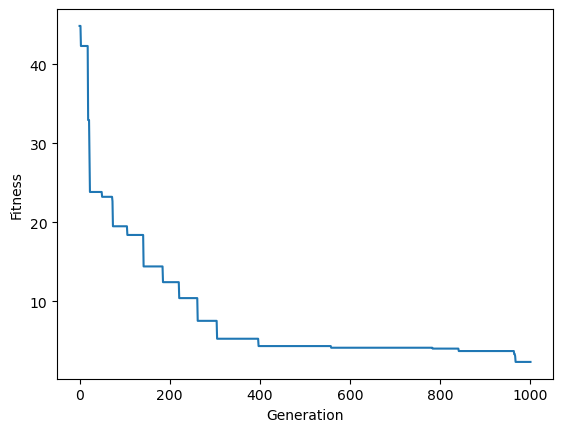

In [4]:
GBS.plot_fitness()

In [5]:
GBS.plot_population()

interactive(children=(IntSlider(value=1, description='generation', max=1000), Output()), _dom_classes=('widget…

Plot the best solution found.

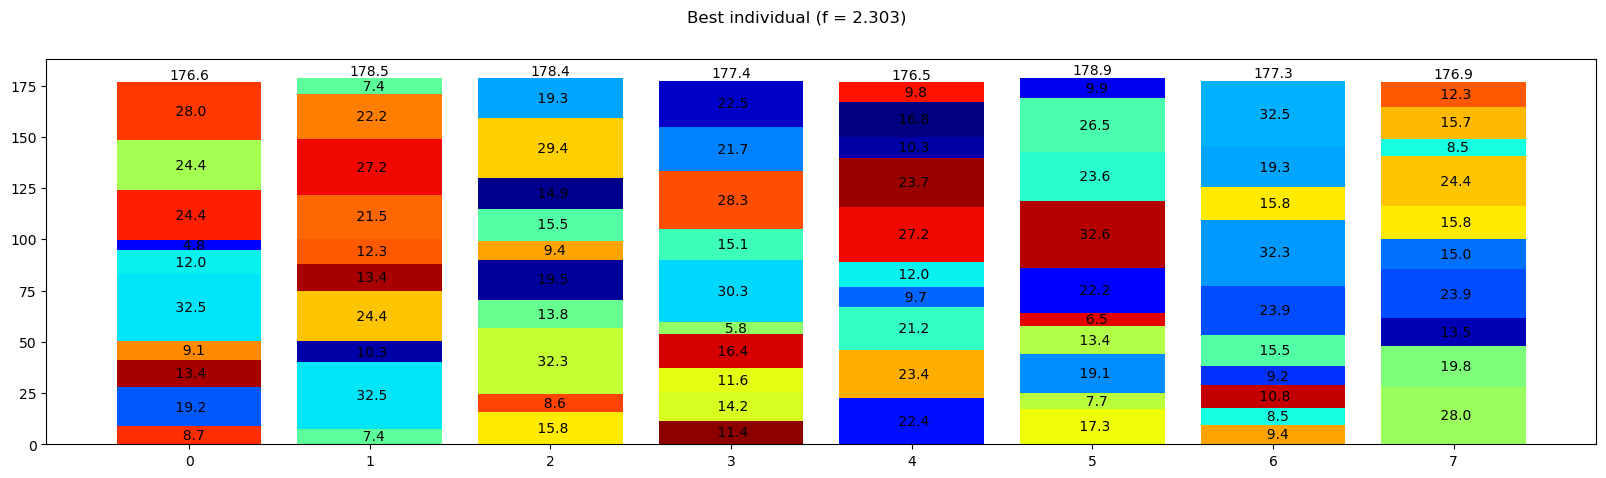

In [6]:
GBS.plot_best_individual()